### Importação dos dados



In [10]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja= pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df['faturamento'] = df['Preço']

In [14]:
loja['loja'] = 'Loja 1'
loja2['loja'] = 'Loja 2'
loja3['loja'] = 'Loja 3'
loja4['loja'] = 'Loja 4'


In [16]:
df_lojas = pd.concat([loja, loja2, loja3, loja4], ignore_index=True)
df_lojas['Data da Compra'] = pd.to_datetime(df_lojas['Data da Compra'], dayfirst=True)
df_lojas['ano_mes'] = df_lojas['Data da Compra'].dt.to_period('M').astype(str)
df_lojas['faturamento'] = df_lojas['Preço'] + df_lojas['Frete']
faturamento_mensal = df_lojas.groupby(['loja', 'ano_mes'])['faturamento'].sum().reset_index()
faturamento_mensal['ano_mes'] = pd.to_datetime(faturamento_mensal['ano_mes'])



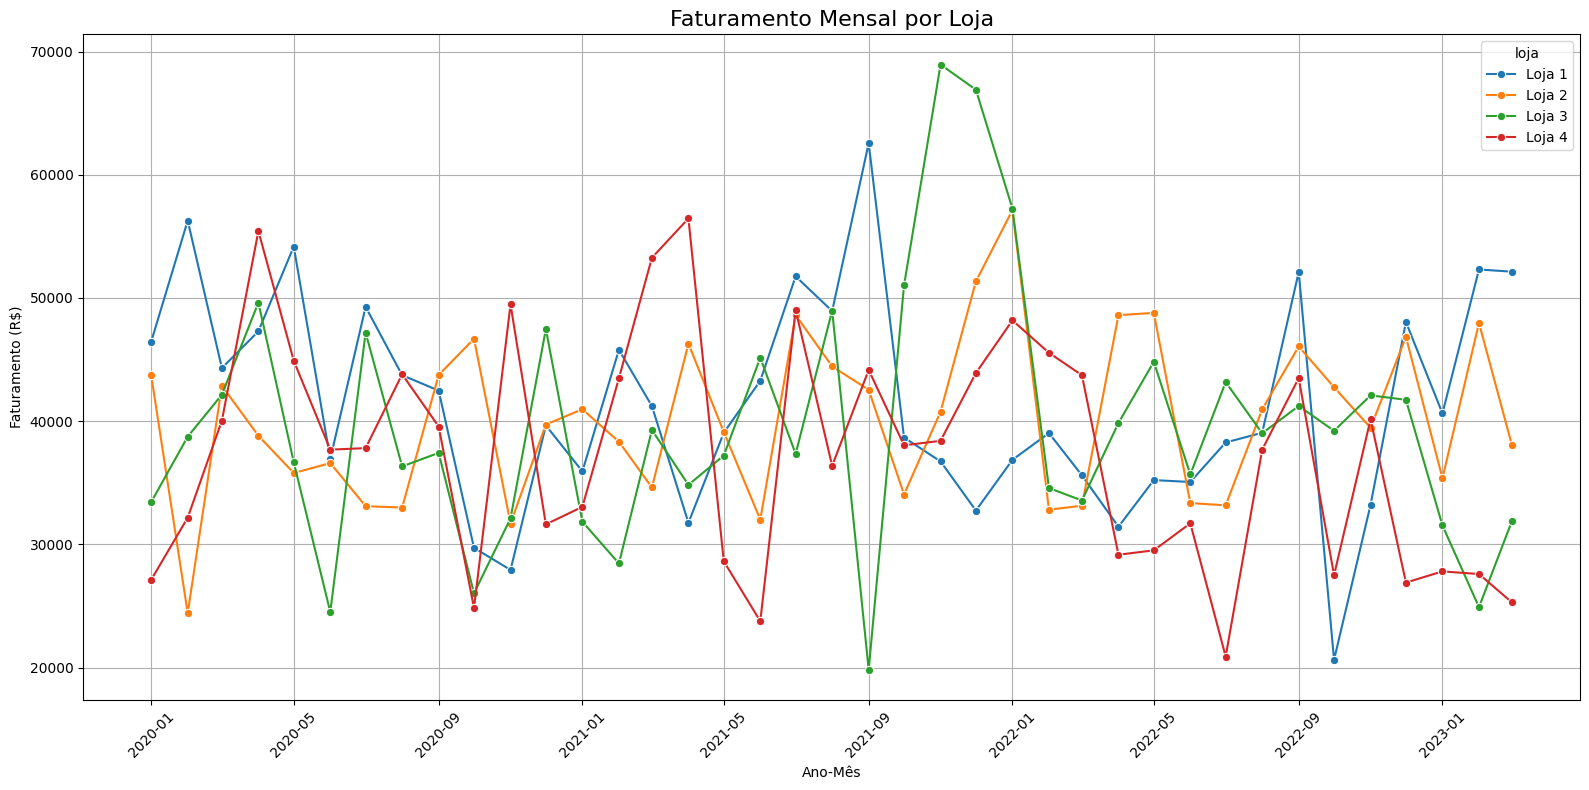

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
sns.lineplot(data=faturamento_mensal, x='ano_mes', y='faturamento', hue='loja', marker='o')

plt.title('Faturamento Mensal por Loja', fontsize=16)
plt.xlabel('Ano-Mês')
plt.ylabel('Faturamento (R$)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Vendas por Categoria


In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
import pandas as pd
dados = {'Categoria do Produto': ['eletronicos', 'eletrodomesticos', 'brinquedos', 'esporte e lazer', 'instrumentos musicais', 'livros', 'moveis', 'utilidades domesticas'], 'faturamento': [2332048.00, 1860199.00, 103502.42, 200891.86, 489701.50, 53007.43, 1064150.00, 80921.72]}
df = pd.DataFrame(dados)
df = df.sort_values(by='faturamento', ascending=False)
df['faturamento'] = df['faturamento'].apply(lambda x: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.'))
df = df.reset_index(drop=True)
print(df)


    Categoria do Produto      faturamento
0            eletronicos  R$ 2.332.048,00
1       eletrodomesticos  R$ 1.860.199,00
2                 moveis  R$ 1.064.150,00
3  instrumentos musicais    R$ 489.701,50
4        esporte e lazer    R$ 200.891,86
5             brinquedos    R$ 103.502,42
6  utilidades domesticas     R$ 80.921,72
7                 livros     R$ 53.007,43


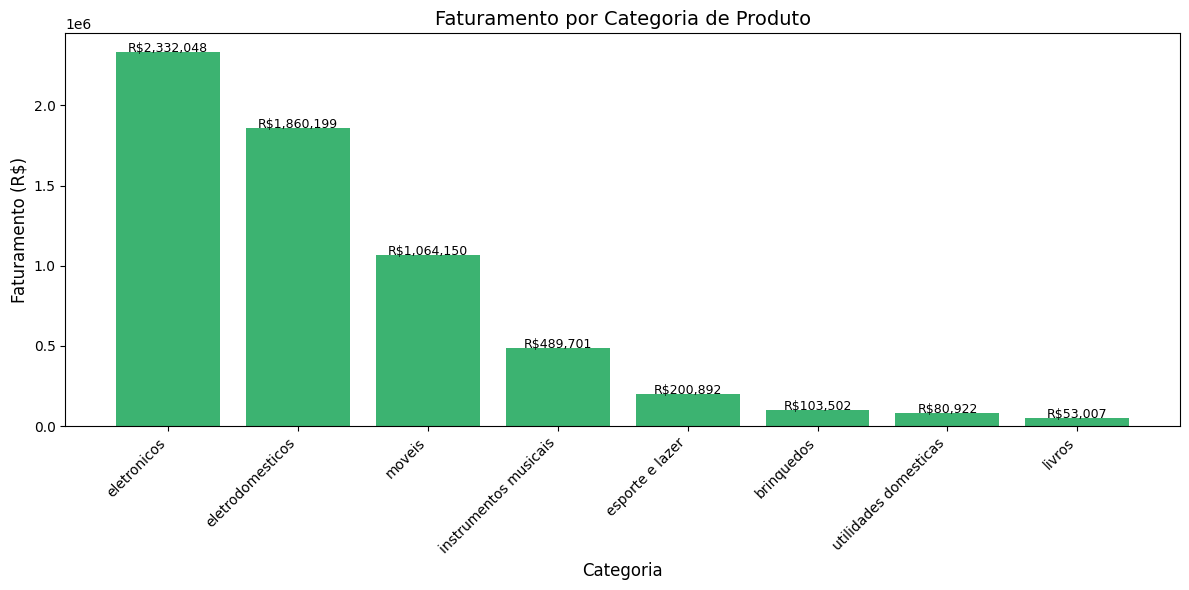

<Figure size 640x480 with 0 Axes>

In [142]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(vendas_categoria['Categoria do Produto'], vendas_categoria['faturamento'], color='mediumseagreen')

plt.title('Faturamento por Categoria de Produto', fontsize=14)
plt.xlabel('Categoria', fontsize=12)
plt.ylabel('Faturamento (R$)', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, valor in enumerate(vendas_categoria['faturamento']):
 plt.text(i, valor + 100, f'R${valor:,.0f}', ha='center', fontsize=9)
plt.tight_layout()
plt.show()

# 3. Média de Avaliação das Lojas

In [143]:
avaliacao_media = df_lojas.groupby('loja')['Avaliação da compra'].mean().reset_index()
avaliacao_media = avaliacao_media.sort_values(by='Avaliação da compra', ascending=False)
print(avaliacao_media)



    loja  Avaliação da compra
2  loja3             4.048326
1  loja2             4.037304
3  loja4             3.995759
0   loja             3.976685


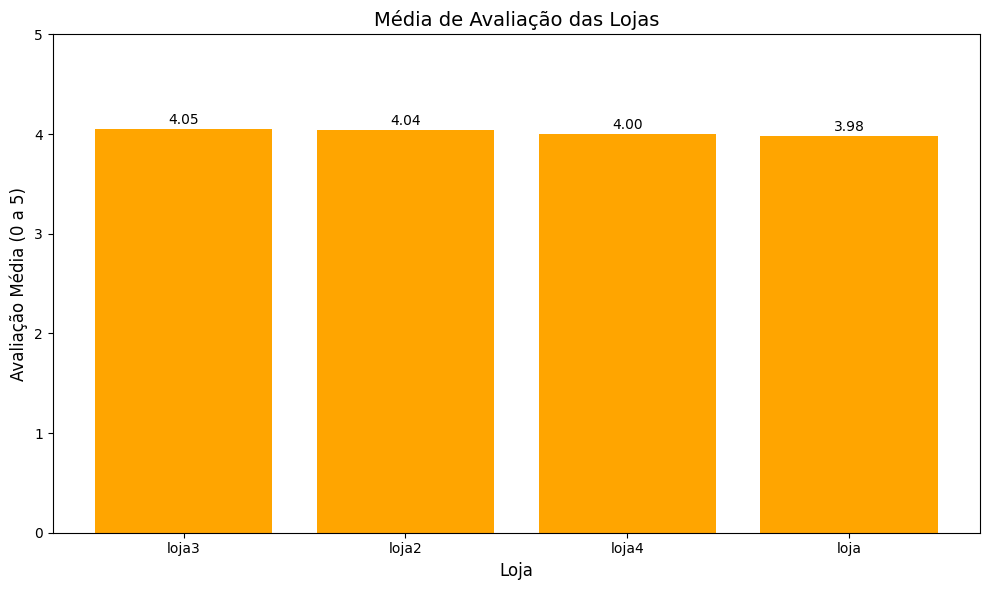

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(avaliacao_media['loja'], avaliacao_media['Avaliação da compra'], color='orange')

plt.title('Média de Avaliação das Lojas', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Avaliação Média (0 a 5)', fontsize=12)
plt.ylim(0, 5)
for i, nota in enumerate(avaliacao_media['Avaliação da compra']):
    plt.text(i, nota + 0.05, f'{nota:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()



# 4. Produtos Mais e Menos Vendidos

In [145]:
vendas_produtos = df_lojas['Produto'].value_counts().reset_index()
vendas_produtos.columns = ['Produto', 'Quantidade de Vendas']



In [146]:
produto_mais_vendido = vendas_produtos.iloc[0]
produto_menos_vendido = vendas_produtos.iloc[-1]

print("✅ Produto mais vendido:")
print(produto_mais_vendido)

print("\n❌ Produto menos vendido:")
print(produto_menos_vendido)


✅ Produto mais vendido:
Produto                 Cômoda
Quantidade de Vendas       210
Name: 0, dtype: object

❌ Produto menos vendido:
Produto                 Celular ABXY
Quantidade de Vendas             157
Name: 50, dtype: object


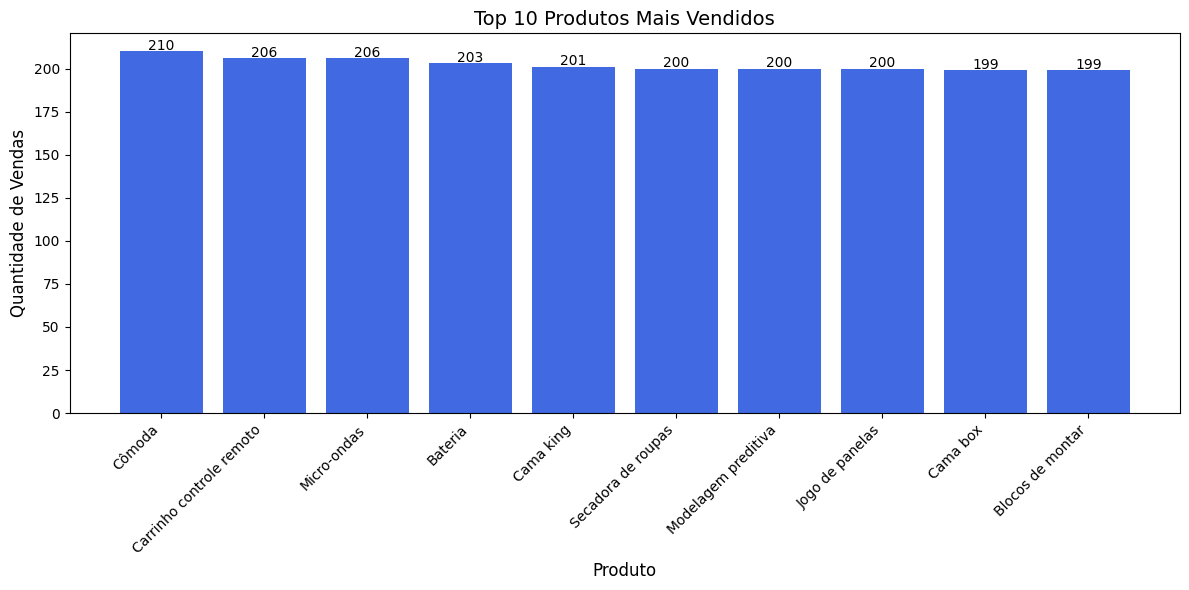

In [147]:
import matplotlib.pyplot as plt

top_10 = vendas_produtos.head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_10['Produto'], top_10['Quantidade de Vendas'], color='royalblue')
plt.title('Top 10 Produtos Mais Vendidos', fontsize=14)
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Quantidade de Vendas', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Mostrar valores
for i, valor in enumerate(top_10['Quantidade de Vendas']):
    plt.text(i, valor + 1, str(valor), ha='center', fontsize=10)

plt.tight_layout()
plt.show()


# 5. Frete Médio por Loja


In [148]:
frete_medio = df_lojas.groupby('loja')['Frete'].mean().reset_index()
frete_medio = frete_medio.sort_values(by='Frete', ascending=False)
print(frete_medio)


    loja      Frete
0   loja  34.691805
1  loja2  33.621941
2  loja3  33.074464
3  loja4  31.278997


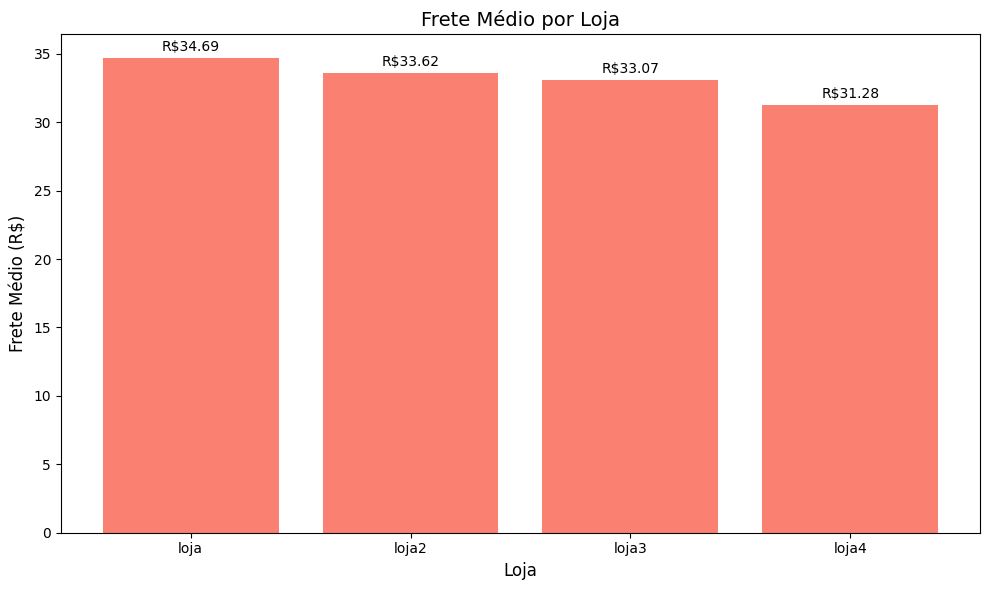

In [149]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(frete_medio['loja'], frete_medio['Frete'], color='salmon')

plt.title('Frete Médio por Loja', fontsize=14)
plt.xlabel('Loja', fontsize=12)
plt.ylabel('Frete Médio (R$)', fontsize=12)
for i, valor in enumerate(frete_medio['Frete']):
    plt.text(i, valor + 0.5, f'R${valor:.2f}', ha='center', fontsize=10)

plt.tight_layout()
plt.show()
